<a href="https://colab.research.google.com/github/klinhle2306/Homelessness/blob/main/Data_Analysis_Homelessness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction


  The 2020 [point-in-time count](https://www.kingcounty.gov/elected/executive/constantine/news/release/2020/July/01-homeless-count.aspx) of people experiencing homelessness for Seattle/King County was 11,751. This represents a 5% increase over the 2019 count and reflects similar trend across many counties in the western U.S.. 
  
  The U.S. Department of Housing and Urban Development (HUD) produced a report in 2019 [Market Predictors of Homelessness](https://www.huduser.gov/portal/sites/default/files/pdf/Market-Predictors-of-Homelessness.pdf) that describes a model-based approach to understanding of the relationship between local housing market factors and homelessness. 
  

## Import libraries

In [203]:
#Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#seaborn is a data visualization library built on matplotlib
import seaborn as sns 
#set the plotting style 
sns.set_style("whitegrid")

#Model preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

#Train-test splits and cross validation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, RandomizedSearchCV

from scipy.stats import uniform, randint

#Models
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, Ridge, Lasso
import statsmodels.api as sm

#Model metrics
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix

import statsmodels.formula.api as smf

from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# Model metrics and analysis
from sklearn.metrics import  mean_squared_error, mean_absolute_error

# plot tree model
import graphviz

# Subset selection
from itertools import combinations
from math import comb


## The data

  
  The [data](https://github.com/brian-fischer/DATA-3320/blob/main/homelessness/05b_analysis_file_update.csv) for this project are described in HUD's report [Market Predictors of Homelessness](https://www.huduser.gov/portal/sites/default/files/pdf/Market-Predictors-of-Homelessness.pdf) in the section titled DATA.

  The data dictionary [HUD TO3 - 05b Analysis File - Data Dictionary.csv](https://github.com/brian-fischer/DATA-3320/blob/main/homelessness/HUD%20TO3%20-%2005b%20Analysis%20File%20-%20Data%20-%20Dictionary.csv) contains descriptions of all variables in the data set.

## Load the clean data

In [204]:
df = pd.read_csv('https://raw.githubusercontent.com/klinhle2306/Homelessness/main/clean_homelessness.csv')

In [205]:
df

,year,coc_number,total_homeless,total_sheltered,total_unsheltered,total_population,house_price_index_2009,log_median_rent,utility_costs,percentage_owners_cost_burden_2016,...,rate_homeless,rate_sheltered,rate_unsheltered,percent_black,percent_latino_hispanic,percent_asian,percent_pacific_islander,percent_population_0_19,percent_population_65_plus,percent_female_population
0,2017,AK-500,1128.0,973.0,155.0,297376,11.743647,2.438863,8.500000,15.334315,...,37.931777,32.719520,5.212257,0.053811,0.089967,0.093952,0.024387,0.269161,0.099140,0.489629
1,2017,AK-501,717.0,578.0,139.0,444146,9.042710,2.249699,14.607715,13.311670,...,16.143340,13.013739,3.129602,0.019530,0.055727,0.040104,0.004593,0.278562,0.109905,0.467752
2,2017,AL-500,1092.0,875.0,217.0,958302,-0.852477,1.862248,19.492331,12.188416,...,11.395155,9.130733,2.264422,0.331147,0.040843,0.016632,0.000311,0.256410,0.149058,0.521677
3,2017,AL-501,606.0,341.0,265.0,622361,-8.507004,1.858394,18.899839,12.539132,...,9.737114,5.479135,4.257979,0.266807,0.033816,0.016889,0.000382,0.254735,0.167126,0.519669
4,2017,AL-502,155.0,133.0,22.0,265264,0.751167,1.362010,18.803186,10.374694,...,5.843235,5.013873,0.829362,0.090348,0.042056,0.004901,0.000471,0.236545,0.190708,0.513937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,2017,WV-500,118.0,111.0,7.0,142272,8.888932,1.459895,16.585392,8.072322,...,8.293972,7.801957,0.492015,0.020074,0.011239,0.005103,0.000098,0.216459,0.213703,0.511886
370,2017,WV-501,205.0,173.0,32.0,136349,2.793695,1.595035,17.695057,9.171934,...,15.034947,12.688029,2.346919,0.035123,0.011837,0.009916,0.000132,0.232763,0.185069,0.510895
371,2017,WV-503,319.0,270.0,49.0,274427,3.041601,1.649177,17.768978,8.460396,...,11.624221,9.838682,1.785539,0.053985,0.010403,0.009529,0.000255,0.230819,0.188192,0.514122
372,2017,WV-508,667.0,567.0,100.0,1275589,4.995708,1.587101,16.804708,9.594313,...,5.228957,4.445005,0.783952,0.032104,0.017506,0.007858,0.000220,0.229239,0.185788,0.502335


In [206]:
variable_remove = ["total_sheltered", "total_unsheltered", "total_black", 
                   "total_latino_hispanic", "total_asian", "total_pacific_islander", 
                   "total_population_0_19", "total_population_65_plus", "total_female_population", 
                   "year", "rate_unsheltered", "rate_sheltered", 'coc_number']

df = df.drop(columns = variable_remove)

## Train test split

In [207]:
x = df[df.columns.difference(['rate_homeless', "total_population", "total_homeless"])]
y = df['rate_homeless']

In [208]:
print(x)

     HUD_unit_occupancy_rate  average_Jan_temperature  \
0                  99.000000                13.800000   
1                  99.000000                13.800000   
2                  95.083710                50.995346   
3                  87.000801                57.893360   
4                  95.178665                48.382103   
..                       ...                      ...   
369                87.321678                35.109627   
370                93.790115                40.581108   
371                95.965622                40.225986   
372                89.981705                37.575474   
373                94.188499                18.187859   

     average_summer_temperature  city_or_urban  federal_funding  \
0                     60.799999              1         29.36677   
1                     60.799999              0          7.60458   
2                     80.874313              0         89.09627   
3                     81.939949              1 

In [209]:
x.columns

Index(['HUD_unit_occupancy_rate', 'average_Jan_temperature',
       'average_summer_temperature', 'city_or_urban', 'federal_funding',
       'federal_funding_change', 'gini_coefficient_2016',
       'high_housing_density', 'house_price_index_2009', 'log_median_rent',
       'medicare_reimbursements_per_enrollee', 'migration_4_year_change',
       'net_migration', 'number_eviction', 'percent_asian', 'percent_black',
       'percent_female_population', 'percent_latino_hispanic',
       'percent_pacific_islander', 'percent_population_0_19',
       'percent_population_65_plus', 'percentage_excessive_drinking',
       'percentage_owners_cost_burden_2016',
       'percentage_renters_severe_cost_burden_2016', 'poverty_rate',
       'proportion_one_person_households', 'rate_unemployment',
       'rental_vacancy_rate', 'share_HUD_units', 'share_built_before_1940',
       'share_no_bachelors', 'share_overcrowded_units_2016',
       'share_renters_2016', 'share_under_18_with_single_parent',
     

In [210]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state = 15)

## Analysis

In [211]:
# Model preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import RobustScaler

# Train-test splits and cross validation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, RandomizedSearchCV

# Models
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, Ridge, Lasso

# Model metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


What columns are predictors in the model?

How well does a multiple linear regression model fit the full data set?

What predictors are important?

Do we need to transform anything nonlinearly?

In [212]:
df.columns

Index(['total_homeless', 'total_population', 'house_price_index_2009',
       'log_median_rent', 'utility_costs',
       'percentage_owners_cost_burden_2016',
       'percentage_renters_severe_cost_burden_2016', 'share_renters_2016',
       'rental_vacancy_rate', 'high_housing_density', 'number_eviction',
       'share_overcrowded_units_2016', 'city_or_urban', 'suburban',
       'rate_unemployment', 'gini_coefficient_2016', 'poverty_rate',
       'share_HUD_units', 'HUD_unit_occupancy_rate', 'share_built_before_1940',
       'net_migration', 'migration_4_year_change',
       'proportion_one_person_households', 'share_under_18_with_single_parent',
       'share_veteran_status', 'share_no_bachelors',
       'medicare_reimbursements_per_enrollee', 'percentage_excessive_drinking',
       'average_Jan_temperature', 'average_summer_temperature',
       'total_Jan_precipitation', 'total_annual_precipitation',
       'federal_funding', 'federal_funding_change', 'rate_homeless',
       'percent

##### $\rightarrow$ Center the variables using the median and scale with the inter-quartile range.

Define the scaler using only the training data. For the validation set approach to work, we can not incorporate any knowledge of the validation set's properties into the model building process.

In [213]:
scaler = RobustScaler().fit(x_train)

##### $\rightarrow$ Perform the scaling transform on the predictors

In [214]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

##### $\rightarrow$ Fit a multiple linear regression model using all of the predictors and view the statistical significance of the coefficients. How many are statistically significant?

### Fit the model

### Ridge regression

In [215]:
# array of all possible alphas
alphas = 10**np.linspace(-3,5,20)

To understand how $\alpha$ changes the fit, note that when $\alpha$ increases, all coefficients are scaled to be smaller.

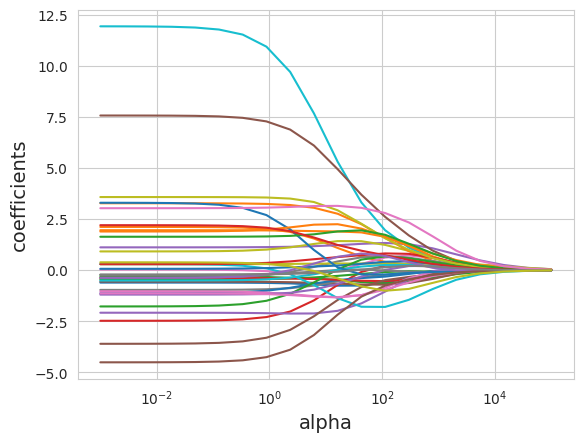

In [216]:
ridge = Ridge(max_iter = 100000)
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(x_train, y_train)
    coefs.append(ridge.coef_)
    
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha', fontsize = 14)
plt.ylabel('coefficients', fontsize = 14);

##### $\rightarrow$ Use cross-validation to find the best alpha for Ridge regression.
Do 5-fold cross validation 

In [217]:
ridgecv = RidgeCV(alphas = alphas, cv = 5, scoring = 'neg_mean_squared_error')

ridgecv.fit(x_train, y_train);

In [218]:
#best alpha
ridgecv.alpha_

42.81332398719396

##### $\rightarrow$ Fit the ridge regression model on the training data with the best $\alpha$ and examine the coefficients.

In [219]:
ridge_reg = Ridge(alpha = ridgecv.alpha_).fit(x_train, y_train)

In [220]:
coefficients = ridge_reg.coef_.round(3)
coefficients = np.insert(coefficients, 0, ridge_reg.intercept_.round(3))

variables = x.columns
variables = np.insert(variables, 0, 'intercept')

pd.DataFrame(data = coefficients, index = variables, columns = ['Estimated Coefficient'])

,Estimated Coefficient
intercept,12.771
HUD_unit_occupancy_rate,-0.752
average_Jan_temperature,0.668
average_summer_temperature,-0.580
city_or_urban,-0.083
federal_funding,1.290
federal_funding_change,-0.699
gini_coefficient_2016,0.306
high_housing_density,-0.344
house_price_index_2009,1.420


##### $\rightarrow$ Use the ridge regression model to predict the test data. Compute the MSE, RMSE, and $R^2$.

In [221]:
MSE_ridge = mean_squared_error(y_test, ridge_reg.predict(x_test))
RMSE_ridge = np.sqrt(MSE_ridge)
R_squared_ridge = r2_score(y_test, ridge_reg.predict(x_test))

print('MSE =', MSE_ridge.round(3), ' RMSE =', RMSE_ridge.round(3), ' R-squared =', R_squared_ridge.round(3))

MSE = 142.204  RMSE = 11.925  R-squared = 0.197


### Lasso

In [222]:
alphas = 10**np.linspace(-4,3,10)

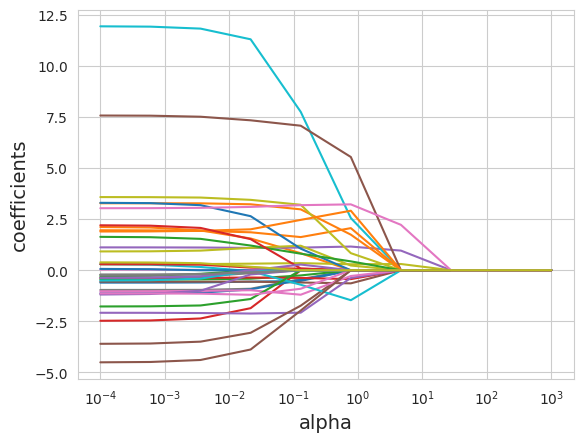

In [223]:
lasso = Lasso(max_iter = 100000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(x_train, y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha', fontsize = 14)
plt.ylabel('coefficients', fontsize = 14);

##### $\rightarrow$ Do 5-fold cross validation to find $\alpha$

In [224]:
lassocv = LassoCV(alphas = None, cv = 5, max_iter = 100_000)

In [225]:
lassocv.fit(x_train, y_train)
lassocv.alpha_

0.3686229191861149

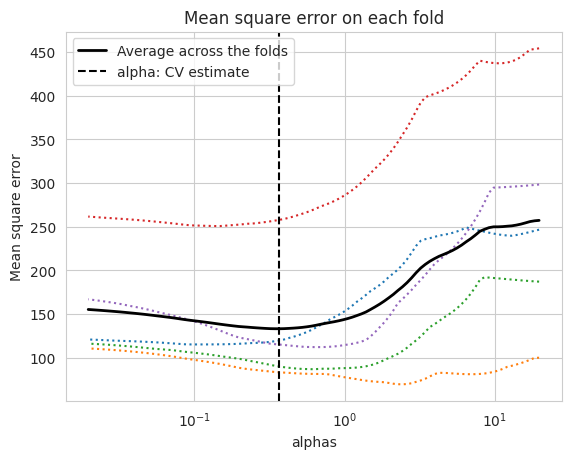

In [226]:
plt.semilogx(lassocv.alphas_, lassocv.mse_path_, ":")
plt.plot(
    lassocv.alphas_ ,
    lassocv.mse_path_.mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(
    lassocv.alpha_, linestyle="--", color="k", label="alpha: CV estimate"
)

plt.legend()
plt.xlabel("alphas")
plt.ylabel("Mean square error")
plt.title("Mean square error on each fold")
plt.axis("tight");

##### $\rightarrow$ Fit the Lasso model on the training data with the best $\alpha$ and examine the coefficients.

In [227]:
lasso_reg = Lasso(alpha = lassocv.alpha_).fit(x_train, y_train)

In [228]:
coefficients = lasso_reg.coef_.round(3)
coefficients = np.insert(coefficients, 0, lasso_reg.intercept_.round(4))

variables = x.columns
variables = np.insert(variables, 0, 'intercept')

pd.DataFrame(data = coefficients.round(2), index = variables, columns = ['Estimated Coefficient'])

,Estimated Coefficient
intercept,12.48
HUD_unit_occupancy_rate,-0.19
average_Jan_temperature,0.00
average_summer_temperature,-0.00
city_or_urban,0.00
federal_funding,1.17
federal_funding_change,-0.64
gini_coefficient_2016,0.00
high_housing_density,-0.00
house_price_index_2009,0.80


##### $\rightarrow$ Use the lasso model to predict the test data. Compute the MSE, RMSE, and $R^2$.

In [229]:
MSE_lasso = mean_squared_error(y_test, lasso_reg.predict(x_test))
RMSE_lasso = np.sqrt(MSE_lasso)
R_squared_lasso = r2_score(y_test, lasso_reg.predict(x_test))

print('MSE =', MSE_lasso.round(3), ' RMSE =', RMSE_lasso.round(3), ' R-squared =', R_squared_lasso.round(3))

MSE = 135.52  RMSE = 11.641  R-squared = 0.235


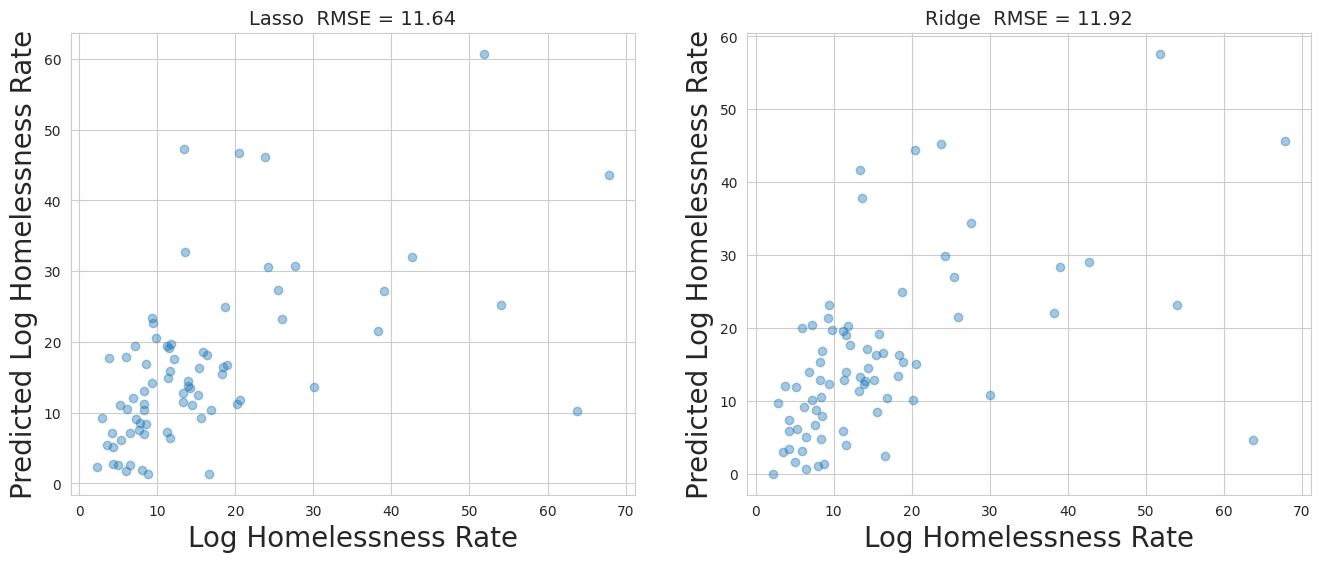

In [230]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.plot(y_test, lasso_reg.predict(x_test),'o', alpha = 0.4)
plt.xlabel('Log Homelessness Rate',fontsize = 20)
plt.ylabel('Predicted Log Homelessness Rate',fontsize = 20)
plt.title('Lasso' + ' ' + ' RMSE = ' + str(RMSE_lasso.round(2)),fontsize = 14)

plt.subplot(1,2,2)
plt.plot(y_test, ridge_reg.predict(x_test),'o', alpha = 0.4)
plt.xlabel('Log Homelessness Rate',fontsize = 20)
plt.ylabel('Predicted Log Homelessness Rate',fontsize = 20)
plt.title('Ridge' + ' ' + ' RMSE = ' + str(RMSE_ridge.round(2)),fontsize = 14);

plt.subplots_adjust(hspace = 0.5)

# XGBoost

In [231]:
xgb_model = xgb.XGBRegressor(objective="reg:squarederror")

params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=200, cv=5, verbose=1, n_jobs=1, return_train_score=True, scoring = 'neg_mean_squared_error')

search.fit(x_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f0e1340f850>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f0e1340e050>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f0e1340f130>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f0e1340d2a0>},
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [232]:
search.best_params_

{'colsample_bytree': 0.7608107534962355,
 'gamma': 0.35277489252915156,
 'learning_rate': 0.10362116472124433,
 'max_depth': 3,
 'n_estimators': 135,
 'subsample': 0.8827773200118652}

Create an XGBoost model with the best parameters

In [233]:
model_xgb = xgb.XGBRegressor(objective="reg:squarederror")

In [234]:
model_xgb.set_params(**search.best_params_)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7608107534962355, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.35277489252915156, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.10362116472124433, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=135, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Fit the model on the training data

In [235]:
model_xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7608107534962355, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.35277489252915156, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.10362116472124433, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=135, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Predict the test data

In [236]:
y_pred_xgb = model_xgb.predict(x_test)

Compute the RMSE

In [237]:
mean_squared_error(y_test, y_pred_xgb, squared = False).round(3)

11.357

Compute the mean absolute error

In [238]:
mean_absolute_error(y_test, y_pred_xgb).round(3)

7.378

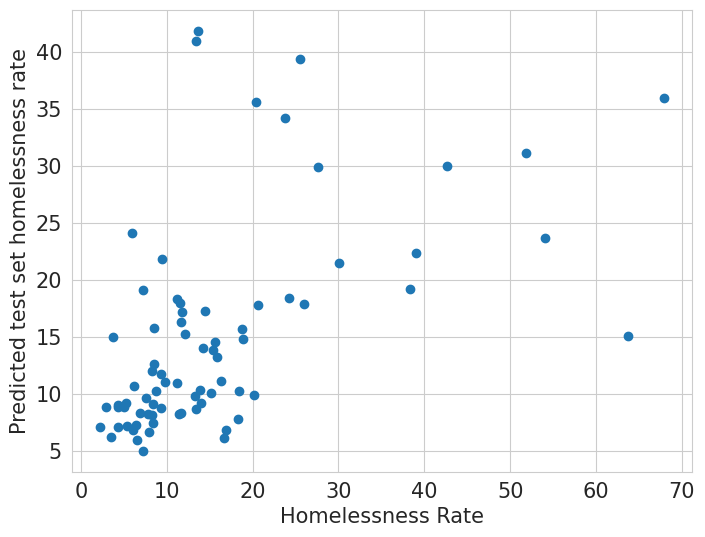

In [239]:
plt.figure(figsize = (8,6))

plt.plot(y_test, y_pred_xgb, 'o');

plt.xlabel('Homelessness Rate', fontsize = 15)
plt.ylabel('Predicted test set homelessness rate', fontsize = 15)

plt.tick_params(labelsize = 15)

Compute the RMSE

In [240]:
mean_squared_error(y_test, y_pred_xgb, squared = False).round(3)

11.357

Compute the mean absolute error

In [241]:
mean_absolute_error(y_test, y_pred_xgb).round(3)

7.378

In [242]:
# Values of tree depth to test
parms = np.arange(1,10)
# Define the set of parameters to tune (just tree depth)
tuned_parameters = [{"max_depth": parms}]
# Specify the number of folds
n_folds = 5

In [243]:
# Initialize a list to record the RMSE
xgb_rmse_kfold = []

# Create the model object
model = xgb.XGBRegressor()

# Create the k-folds object with the number of splits
kf = KFold(n_splits=10)

# Loop over all splits
for train_index, test_index in kf.split(x):
    x_train = x.iloc[train_index,:]
    y_train = y.iloc[train_index]

    x_test = x.iloc[test_index,:]
    y_test = y.iloc[test_index]

    # Do the cross validation
    modelCV = GridSearchCV(model, tuned_parameters, cv=n_folds, refit=False, scoring = 'neg_mean_squared_error').fit(x_train, y_train)

    # Get the scores
    scores = modelCV.cv_results_["mean_test_score"]

    # Get the best value of alpha
    best_model = modelCV.best_params_['max_depth']

    # Fit the best model
    xgb_model = xgb.XGBRegressor(max_depth=best_model)

    xgb_model.fit(x_train, y_train)

    # Predict
    y_prediction = xgb_model.predict(x_test)

    xgb_rmse_kfold.append(mean_squared_error(y_test, y_prediction, squared=False))

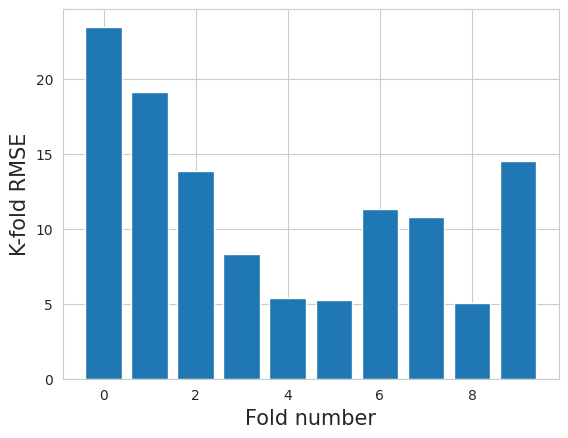

In [244]:
#plt.boxplot(tree_rmse);
plt.bar(np.arange(kf.get_n_splits()), xgb_rmse_kfold);
plt.xlabel('Fold number', fontsize=15);
plt.ylabel('K-fold RMSE', fontsize=15);

In [245]:
print(x)

     HUD_unit_occupancy_rate  average_Jan_temperature  \
0                  99.000000                13.800000   
1                  99.000000                13.800000   
2                  95.083710                50.995346   
3                  87.000801                57.893360   
4                  95.178665                48.382103   
..                       ...                      ...   
369                87.321678                35.109627   
370                93.790115                40.581108   
371                95.965622                40.225986   
372                89.981705                37.575474   
373                94.188499                18.187859   

     average_summer_temperature  city_or_urban  federal_funding  \
0                     60.799999              1         29.36677   
1                     60.799999              0          7.60458   
2                     80.874313              0         89.09627   
3                     81.939949              1 

In [246]:
import statsmodels.formula.api as sm
from statsmodels.api import datasets
import pandas as pd

ar2 = dict()
candidates = []
last_max = -1

df.join(pd.get_dummies(df['poverty_rate'], drop_first=True))
y = 'rate_homeless'

while(True):
    for attri in df.drop([y] + candidates, axis=1).columns:
        if len(candidates) == 0:
            features = attri
        else:
            features = attri + ' + '
            features += ' + '.join(candidates)

        model = sm.ols(y + ' ~ ' + features, df).fit()
        ar2[attri] = model.rsquared

    max_ar2 =  max(ar2.values())
    max_ar2_key = max(ar2, key=ar2.get)

    if max_ar2 > last_max:
        candidates.append(max_ar2_key)
        last_max = max_ar2

        print('step: ' + str(len(candidates)))
        print(candidates)
        print('Adjusted R2: ' + str(max_ar2))
        print('===============')
    else:
        print(model.summary())
        break

print('\n\n')
print('elminated variables: ')
print(set(df.drop(y, axis=1).columns).difference(candidates))

step: 1
['share_renters_2016']
Adjusted R2: 0.22760858532471961
step: 2
['share_renters_2016', 'total_Jan_precipitation']
Adjusted R2: 0.305630875805165
step: 3
['share_renters_2016', 'total_Jan_precipitation', 'total_homeless']
Adjusted R2: 0.3656797754584745
step: 4
['share_renters_2016', 'total_Jan_precipitation', 'total_homeless', 'percent_population_65_plus']
Adjusted R2: 0.41201855725992176
step: 5
['share_renters_2016', 'total_Jan_precipitation', 'total_homeless', 'percent_population_65_plus', 'percentage_excessive_drinking']
Adjusted R2: 0.4578760658951281
step: 6
['share_renters_2016', 'total_Jan_precipitation', 'total_homeless', 'percent_population_65_plus', 'percentage_excessive_drinking', 'percent_pacific_islander']
Adjusted R2: 0.48637980381001245
step: 7
['share_renters_2016', 'total_Jan_precipitation', 'total_homeless', 'percent_population_65_plus', 'percentage_excessive_drinking', 'percent_pacific_islander', 'total_population']
Adjusted R2: 0.5101526547445137
step: 8
['